In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



In [11]:
# Calculate the date one year from the last date in data set.
prev_yr = dt.date(2017,8,23)-dt.timedelta(days=365)
prev_yr

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
yr_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_yr)

# Save the query results as a Pandas DataFrame and set the index to the date column
yr_precip_df = pd.DataFrame(yr_precip, columns=['date','precip'])

# Sort the dataframe by date
yr_precip_df = yr_precip_df.sort_values('date')
yr_precip_df

,date,precip
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


Text(0.5, 1.0, 'Precipitation over one year')

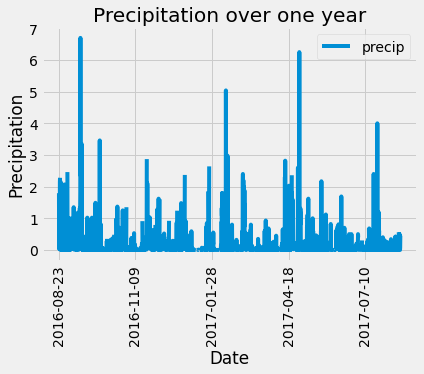

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
yr_precip_df.plot(x='date', y='precip', rot=90)
plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.title('Precipitation over one year')

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yr_precip_df.describe()

,precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
station_count

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

station_counts = pd.DataFrame(station_counts, columns=['station ID','counts'])
station_counts = station_counts.sort_values('counts', ascending=False)
station_counts

,station ID,counts
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = station_counts.loc[station_counts.counts == station_counts.counts.max(), 'station ID'].values[0]
active_station

'USC00519281'

In [18]:
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == active_station).all()

lowest_temp

[(54.0,)]

In [19]:
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == active_station).all()
highest_temp    

[(85.0,)]

In [20]:
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == active_station).all()
avg_temp

[(71.66378066378067,)]

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [22]:
recent_date = session.query(Measurement.date).\
                order_by(Measurement.date.desc()).\
                filter(Measurement.station == active_station).first()
recent_date

('2017-08-18',)

In [23]:
prev_yr = dt.date(2017,8,18)-dt.timedelta(days=365)
prev_yr

datetime.date(2016, 8, 18)

In [24]:
yrActiveStn = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.date >= prev_yr).\
                filter(Measurement.station == active_station)

yrActiveStn_df = pd.DataFrame(yrActiveStn, columns=['date', 'temperature'])
yrActiveStn_df = yrActiveStn_df.sort_values('date')
yrActiveStn_df

,date,temperature
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


Text(0.5, 1.0, 'Temperatures over a year at Station USC00519281')

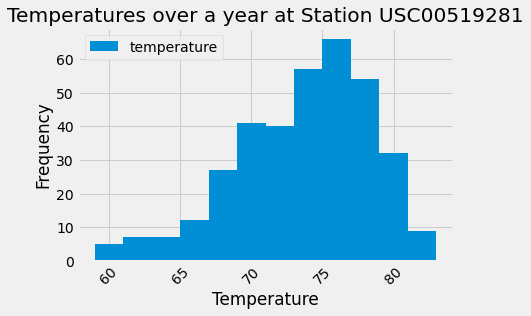

In [25]:
yrActiveStn_df.plot.hist(bins=12, rot=45)
plt.xlabel('Temperature')
plt.title (f'Temperatures over a year at Station {active_station}')

# Close session

In [26]:
# Close Session
session.close()